## Análise Exploratória do Mercado de Ciência e Análise de Dados - Pedro Silva

### Sobre o Conjunto de Dados:

#### work_year
Descrição: Ano em que os dados salariais foram registrados.
Tipo: Numérico (inteiro).
#### job_title
Descrição: Título do cargo desempenhado pelo profissional na área de dados.
Tipo: Categórico.
#### job_category
Descrição: Categoria geral à qual o cargo pertence.
Tipo: Categórico.
#### salary_currency
Descrição: Moeda na qual o salário foi originalmente reportado.
Tipo: Categórico.
#### salary
Descrição: Valor do salário bruto anual reportado na moeda original.
Tipo: Numérico.
#### salary_in_usd
Descrição: Valor do salário bruto anual convertido para dólares americanos (USD) para padronização.
Tipo: Numérico.
#### employee_residence
Descrição: País de residência do funcionário.
Tipo: Categórico.
#### experience_level
Descrição: Nível de experiência profissional do colaborador.
Tipo: Categórico.
Exemplo:
EN (Entry-Level) – Iniciante.
MI (Mid-Level) – Intermediário.
SE (Senior-Level) – Experiente.
EX (Executive) – Executivo.
#### employment_type
Descrição: Tipo de contrato de trabalho.
Tipo: Categórico.
Exemplo:
FT (Full-Time) – Integral.
PT (Part-Time) – Parcial.
CT (Contract) – Contrato.
FL (Freelance) – Freelancer.
#### work_setting
Descrição: Ambiente de trabalho predominante.
Tipo: Categórico.
Exemplo:
On-Site (Presencial).
Remote (Remoto).
Hybrid (Híbrido).
#### company_location
Descrição: País onde a empresa está localizada.
Tipo: Categórico.
#### company_size
Descrição: Tamanho da empresa com base no número de funcionários.
Tipo: Categórico.
Exemplo:
S (Small) – Pequena (1-50 funcionários).
M (Medium) – Média (51-250 funcionários).
L (Large) – Grande (251 ou mais funcionários).

### Conclusão:

Com base nessas variáveis, o dataset fornece uma visão abrangente sobre os salários no mercado de ciência e análise de dados, possibilitando análises de padrões salariais, fatores influentes e tendências de contratação.

### Iniciando Análise Exploratória de Dados:

In [3]:
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Carregando dataframe
df = pd.read_csv("jobs_in_data.csv")

In [34]:
# Formatando saída de dados
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

### Compreendendo o Conjunto de Dados:

In [35]:
# Visualizando as primeiras 5 linhas do dataset
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [5]:
# Analisando as dimensões do arquivo
df.shape

(9355, 12)

In [6]:
# Verificando informações do arquivo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [7]:
# Verificando valores nulos
df.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [38]:
# Total de valores únicos de cada variável
valores_unicos = []
for i in df.columns[0:12].tolist():
    print(i,':', len(df[i].astype(str).value_counts()))
    valores_unicos.append(len(df[i].astype(str).value_counts()))

work_year : 4
job_title : 125
job_category : 10
salary_currency : 11
salary : 1507
salary_in_usd : 1786
employee_residence : 83
experience_level : 4
employment_type : 4
work_setting : 3
company_location : 70
company_size : 3


### Visualizando Medidas Estatísticas do Conjunto de Dados:

In [19]:
# Visualizando estatísticas do dataset
df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


### Avaliando Variáveis Individualmente:

In [30]:
# Total de observações por cargo
df.groupby(['job_title']).size().sort_values(ascending=False)

job_title
Data Engineer                           2195
Data Scientist                          1989
Data Analyst                            1388
Machine Learning Engineer                991
Applied Scientist                        272
                                        ... 
Manager Data Management                    1
Cloud Data Architect                       1
Deep Learning Researcher                   1
Machine Learning Operations Engineer       1
Staff Machine Learning Engineer            1
Length: 125, dtype: int64

In [29]:
# Total de observações por categoria de cargo
df.groupby(['job_category']).size().sort_values(ascending=False)

job_category
Data Science and Research         3014
Data Engineering                  2260
Data Analysis                     1457
Machine Learning and AI           1428
Leadership and Management          503
BI and Visualization               313
Data Architecture and Modeling     259
Data Management and Strategy        61
Data Quality and Operations         55
Cloud and Database                   5
dtype: int64

<AxesSubplot:title={'center':'Categoria de Trabalho'}>

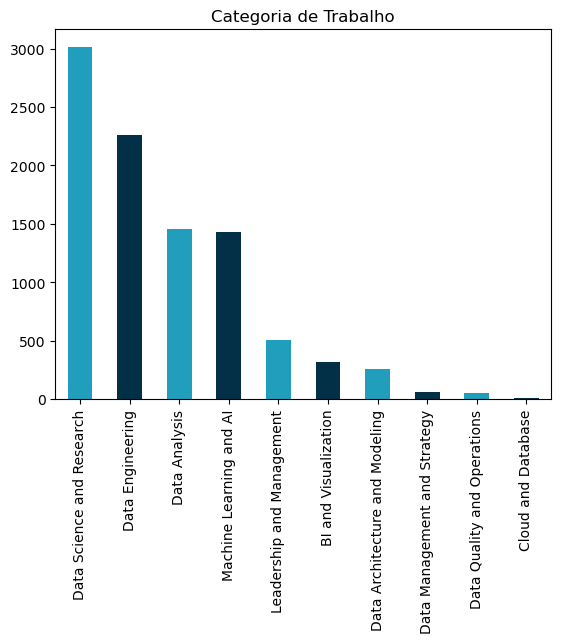

In [33]:
# Visualizando através de um gráfico
df.job_category.value_counts().plot(kind='bar', title='Categoria de Trabalho', color=['#219ebc', '#023047'])